In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
t1 = tf.constant([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
], dtype=tf.float32)

ds1 = tf.data.Dataset.from_tensors(t1)  
ds2 = tf.data.Dataset.from_tensor_slices(t1) 


for element in ds1:
    print(element)


tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)


In [3]:
for element in ds2:
    print(element)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)


In [4]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255
type(images),type(labels)


(numpy.ndarray, numpy.ndarray)

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((images,labels))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [6]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'

file_names = ['cowper.txt', 'derby.txt', 'butler.txt']


file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)  
    for file_name in file_names
]


In [7]:
text_line_dataset = tf.data.TextLineDataset(file_paths)

In [8]:
for line in text_line_dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [9]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = tf.keras.utils.get_file(
    "stack_overflow_16k", 
    origin=data_url,
    untar=True
)

# Now point to extracted path
dataset_dir = pathlib.Path(dataset_dir)
train_dir = dataset_dir / 'train'

print(train_dir)  

C:\Users\karth\.keras\datasets\stack_overflow_16k\train


In [10]:

# Now load the dataset
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)


Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [11]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")


df = pd.read_csv(titanic_file)


titanic_dataset = tf.data.Dataset.from_tensor_slices(dict(df))


for feature_batch in titanic_dataset.take(1):
    for key, value in feature_batch.items():
        print("{!r:20s}:{}".format(key, value))

'survived'          :0
'sex'               :b'male'
'age'               :22.0
'n_siblings_spouses':1
'parch'             :0
'fare'              :7.25
'class'             :b'Third'
'deck'              :b'unknown'
'embark_town'       :b'Southampton'
'alone'             :b'n'


In [12]:

titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file,
    batch_size=4, 
    label_name="survived",  
    select_columns=['class', 'fare', 'survived']
)

for feature_batch, label_batch in titanic_batches.take(1):
    print(f"Survived: {label_batch}")
    for key, value in feature_batch.items():
        print(f"{key:20s}: {value}")


Survived: [0 0 0 1]
fare                : [21.      0.     20.2125 26.    ]
class               : [b'Second' b'Third' b'Third' b'Second']


In [13]:
titanic_types = [tf.int32, tf.string, tf.float32,tf.int32,tf.int32,
tf.float32,tf.string,tf.string, tf.string, tf.string]
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types ,
header=True)
for line in dataset.take(10):
     print([item.numpy()for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


In [14]:

flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
)


flowers_root = pathlib.Path(flowers_root)


In [15]:
for item in flowers_root.glob("*"):
    print(item)

C:\Users\karth\.keras\datasets\flower_photos\daisy
C:\Users\karth\.keras\datasets\flower_photos\dandelion
C:\Users\karth\.keras\datasets\flower_photos\flower_photos
C:\Users\karth\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\karth\.keras\datasets\flower_photos\roses
C:\Users\karth\.keras\datasets\flower_photos\sunflowers
C:\Users\karth\.keras\datasets\flower_photos\tulips


In [16]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root / '*/*'))


def process_path(file_path):
    
    label = tf.strings.split(file_path, os.sep)[-2]
    return tf.io.read_file(file_path), label


labeled_ds = file_path_ds.map(process_path)


for image_raw, label in labeled_ds.take(1):
    print(image_raw, label, sep="\n")

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x02@ICC_PROFILE\x00\x01\x01\x00\x00\x020ADBE\x02\x10\x00\x00mntrRGB XYZ \x07\xcf\x00\x06\x00\x03\x00\x00\x00\x00\x00\x00acspAPPL\x00\x00\x00\x00none\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-ADBE\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ncprt\x00\x00\x00\xfc\x00\x00\x002desc\x00\x00\x010\x00\x00\x00iwtpt\x00\x00\x01\x9c\x00\x00\x00\x14bkpt\x00\x00\x01\xb0\x00\x00\x00\x14rTRC\x00\x00\x01\xc4\x00\x00\x00\x0egTRC\x00\x00\x01\xd4\x00\x00\x00\x0ebTRC\x00\x00\x01\xe4\x00\x00\x00\x0erXYZ\x00\x00\x01\xf4\x00\x00\x00\x14gXYZ\x00\x00\x02\x08\x00\x00\x00\x14bXYZ\x00\x00\x02\x1c\x00\x00\x00\x14text\x00\x00\x00\x00Copyright 1999 Adobe Systems Incorporated\x00\x00\x00desc\x00\x00\x00\x00\x00\x00\x00\x0fColorM

In [17]:

inc_dataset = tf.data.Dataset.range(100)


dec_dataset = tf.data.Dataset.range(0, -100, -1)


dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))


batched_dataset = dataset.batch(4)  

for batch in batched_dataset.take(4):
    print([arr.numpy() for arr in batch])  


[array([0, 1, 2, 3], dtype=int64), array([ 0, -1, -2, -3], dtype=int64)]
[array([4, 5, 6, 7], dtype=int64), array([-4, -5, -6, -7], dtype=int64)]
[array([ 8,  9, 10, 11], dtype=int64), array([ -8,  -9, -10, -11], dtype=int64)]
[array([12, 13, 14, 15], dtype=int64), array([-12, -13, -14, -15], dtype=int64)]


In [18]:
batched_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [19]:
dataset.batch(4,drop_remainder = True)


<_BatchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.int64, name=None), TensorSpec(shape=(4,), dtype=tf.int64, name=None))>

In [20]:

dataset = tf.data.Dataset.range(100)


dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))

padded_batch_dataset = dataset.padded_batch(4, padded_shapes=(None,))


for batch in padded_batch_dataset.take(2):
    print(batch.numpy())
    print()


[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [21]:
dataset = tf.data.TextLineDataset(titanic_file)
dataset.shuffle(buffer_size=10)


<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

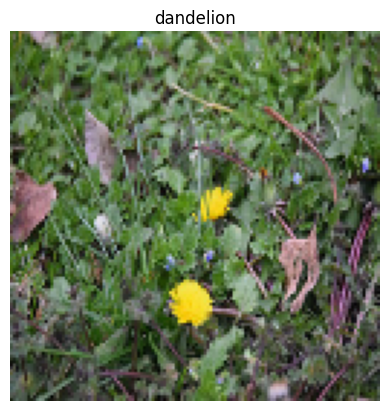

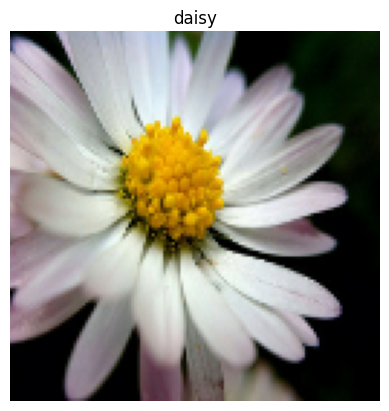

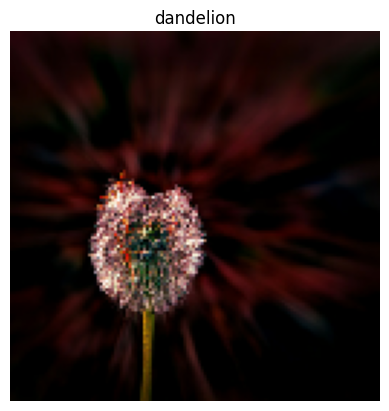

In [22]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root / '*/*'))


def parse_image(filename):
    label = tf.strings.split(filename, os.sep)[-2]  
    image = tf.io.read_file(filename)  
    image = tf.io.decode_jpeg(image)  
    image = tf.image.convert_image_dtype(image, tf.float32) 
    image = tf.image.resize(image, [128, 128]) 
    return image, label


image_ds = file_path_ds.map(parse_image)


def show(image, label):
    plt.imshow(image)  
    plt.title(label.numpy().decode("utf-8"))  
    plt.axis("off")  
    plt.show()


for image, label in image_ds.take(3):
    show(image, label)

In [23]:
(train, test) = tf.keras.datasets.fashion_mnist.load_data()


images, labels = train
images = images / 255.0  
labels = labels.astype(np.int32)  


fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)  
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  
    tf.keras.layers.Dense(10)  
])


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2


C:\Users\karth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7414 - loss: 0.7709
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.8383 - loss: 0.4715


In [24]:
loss,accuracy = model.evaluate(fmnist_train_ds)
print("Loss:",loss)
print("Accuracy:",accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.8391 - loss: 0.4622
Loss: 0.463451623916626
Accuracy: 0.8383333086967468


In [25]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)

result = model.predict(predict_ds,steps = 10)
print(result.shape)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
(320, 10)
